# Melting Curve Analysis monovalent metal ions - KLTL_GAAA polyA

In [1]:
#Import everything from main
from main import  *

In [2]:
# legende in plots rechts aligned
def legend_text_right_align(legend, width):
    hp = legend._legend_box.get_children()[1]
    for vp in hp.get_children():
        for row in vp.get_children():
            row.set_width(width)  # need to adapt this manually
            row.mode = "expand"
            row.align = "right"

In [3]:
#Optinal input of metadata, which should be applied to one data-file  ->  {'file_name': {'meta_name_1': meta_value}}
EXTRA_META = {'2023-07-26_RNA_melting_MgCl2.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'K(I)'}, 
              '2023-08-04_RNA_melting_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2023-08-16_RNA_melting_CaCl2_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2023-08-16_RNA_melting_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'K(I)'},
              '2023-08-18_RNA_melting_CaCl2_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2023-08-21_RNA_melting_MgCl2_NaCl_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'Na(I)'},
              '2023-08-22_RNA_melting_CaCl2_NaCl_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'Na(I)'},
              '2023-08-23_RNA_melting_2_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Monovalent Ion': 'Na(I)'},
              '2023-08-23_RNA_melting_NaCl_VS.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Monovalent Ion': 'Na(I)'},
              '2023-11-09_RNA_melting_MgCl2_KCl.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'K(I)'},
              '2023-11-15_RNA_melting_MgCl2_KCl.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'K(I)'},
              '2023-11-17_RNA_melting_MgCl2_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'Na(I)'},
              '2023-11-20_RNA_melting_MgCl2_NaCl.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'Na(I)'},
              '2023-11-23_RNA_melting_CaCl2_KCl.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2023-11-24_RNA_melting_CaCl2_KCl.csv': {'Sample': 'RNA', 'bg in mM': 116, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2024-02-16_RNA_melting_CaCl2_KCl_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2024-02-19_RNA_melting_CaCl2_KCl_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Ca(II)', 'Monovalent Ion': 'K(I)'},
              '2024-02-14_RNA_melting_MgCl2_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'K(I)'},
              '2024-02-15_RNA_melting_MgCl2_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'K(I)'},
              '2024-02-20_RNA_melting_MgCl2_Na_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'Na(I)'},
              '2024-02-21_RNA_melting_MgCl2_Na_only_HEPES.csv': {'Sample': 'RNA', 'bg in mM': 16, '[Buffer] in mM': 20, 'Divalent Ion': 'Mg(II)', 'Monovalent Ion': 'Na(I)'}
             }# optinal: spezifisch fuer eine Messung kann hier jeweils Metadaten hinzugefuegt werden

#Create class object --> nicht optional
data_obj = MeltingCurveAnalysis(EXTRA_META)
#Load all files from 'data_raw' folder --> nicht optional
# ALLE Messungen im Ordner werden eingeladen!!!
data_obj.fill_data_dict()


#Generation of meta data, from the given sample name and add them to meta, all file names in '[]' 
data_obj.meta_from_name_Paul(['2023-07-26_RNA_melting_MgCl2.csv', 
                              '2023-08-04_RNA_melting_VS.csv',
                              '2023-08-16_RNA_melting_CaCl2_VS.csv',
                              '2023-08-16_RNA_melting_VS.csv',
                              '2023-08-18_RNA_melting_CaCl2_VS.csv',
                              '2023-08-21_RNA_melting_MgCl2_NaCl_VS.csv',
                              '2023-08-22_RNA_melting_CaCl2_NaCl_VS.csv',
                              '2023-08-23_RNA_melting_2_VS.csv',
                              '2023-08-23_RNA_melting_NaCl_VS.csv',
                              '2023-11-09_RNA_melting_MgCl2_KCl.csv',
                              '2023-11-15_RNA_melting_MgCl2_KCl.csv',
                              '2023-11-17_RNA_melting_MgCl2_NaCl.csv',
                              '2023-11-20_RNA_melting_MgCl2_NaCl.csv',
                              '2023-11-23_RNA_melting_CaCl2_KCl.csv',
                              '2023-11-24_RNA_melting_CaCl2_KCl.csv',
                              '2024-02-14_RNA_melting_MgCl2_only_HEPES.csv',
                              '2024-02-15_RNA_melting_MgCl2_only_HEPES.csv',
                              '2024-02-16_RNA_melting_CaCl2_KCl_only_HEPES.csv',
                              '2024-02-19_RNA_melting_CaCl2_KCl_only_HEPES.csv',
                              '2024-02-20_RNA_melting_MgCl2_Na_only_HEPES.csv',
                              '2024-02-21_RNA_melting_MgCl2_Na_only_HEPES.csv',
                              '2024-02-22_RNA_melting_only_HEPES.csv',
                              '2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv'
                             ])# Funktion heisst .meta_from_name_Paul --> wieder fuer alle Messungen einzeln aufschreiben
#Ceate an overview of all curves in folder data_raw, this function takes metadata from all curves and puts them in one dataframe
data_obj._create_meta_overview()
data_obj.meta_overview # gi ist einfach nur ein index der durchzaehlt

,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,Sample,bg in mM,[Buffer] in mM,Divalent Ion,Monovalent Ion,gi,file_name,Concentration,Concentration Unit,Ion
0,1,5 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,116.0,20.0,Mg(II),K(I),1,2023-07-26_RNA_melting_MgCl2.csv,5.0,mM,MgCl2
1,2,5 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,116.0,20.0,Mg(II),K(I),2,2023-07-26_RNA_melting_MgCl2.csv,5.0,mM,MgCl2
2,3,5 mM MgCl2,260.0,90.0,21.0,2,Cooling,RNA,116.0,20.0,Mg(II),K(I),3,2023-07-26_RNA_melting_MgCl2.csv,5.0,mM,MgCl2
3,4,5 mM MgCl2,260.0,21.0,90.0,2,Heating,RNA,116.0,20.0,Mg(II),K(I),4,2023-07-26_RNA_melting_MgCl2.csv,5.0,mM,MgCl2
4,5,1 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,116.0,20.0,Mg(II),K(I),5,2023-07-26_RNA_melting_MgCl2.csv,1.0,mM,MgCl2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1211,28,10 mM CaCl2,400.0,21.0,90.0,2,Heating,RNA,16.0,20.0,Ca(II),K(I),1212,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,10.0,mM,CaCl2
1212,29,5 mM CaCl2,400.0,90.0,21.0,1,Cooling,RNA,16.0,20.0,Ca(II),K(I),1213,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,5.0,mM,CaCl2
1213,30,5 mM CaCl2,400.0,21.0,90.0,1,Heating,RNA,16.0,20.0,Ca(II),K(I),1214,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,5.0,mM,CaCl2
1214,31,5 mM CaCl2,400.0,90.0,21.0,2,Cooling,RNA,16.0,20.0,Ca(II),K(I),1215,2024-02-23_RNA_melting_CaCl2_KCl_only_HEPES.csv,5.0,mM,CaCl2


## Fit

parameter names: ['e1_DH', 'e1_Tm', 'e1_m1', 'e1_n1', 'e1_m2', 'e1_n2']
parameter names: ['e2_DH', 'e2_Tm', 'e2_m1', 'e2_n1', 'e2_m2', 'e2_n2']
independent variables: ['T']
independent variables: ['T']


,Measurement,Sample Name,Wavelength (nm),Temperature Start (°C),Temperature End (°C),Run,Ramp Type,Sample,bg in mM,[Buffer] in mM,...,direct_melt_DS_J/mol/K_1,direct_melt_Tm_K_2,direct_melt_DTm_2,direct_melt_DH_J/mol_2,direct_melt_DDH_2,direct_melt_DS_J/mol/K_2,direct_melt_m3,direct_melt_Dm3,direct_melt_n3,direct_melt_Dn3
0,1,5 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,116.0,20.0,...,-1083.285892,336.768098,0.479703,-250058.780873,12295.104539,-742.525145,0.00464,0.000306,-1.378436,0.103052
1,2,5 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,5 mM MgCl2,260.0,90.0,21.0,2,Cooling,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,5 mM MgCl2,260.0,21.0,90.0,2,Heating,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,1 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,6,1 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,7,1 mM MgCl2,260.0,90.0,21.0,2,Cooling,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,8,1 mM MgCl2,260.0,21.0,90.0,2,Heating,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,9,0.1 mM MgCl2,260.0,90.0,21.0,1,Cooling,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10,0.1 mM MgCl2,260.0,21.0,90.0,1,Heating,RNA,116.0,20.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


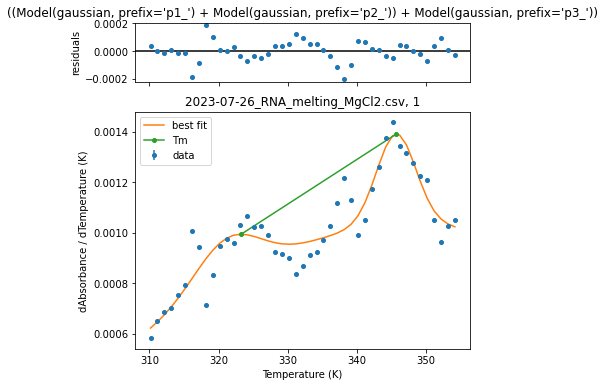

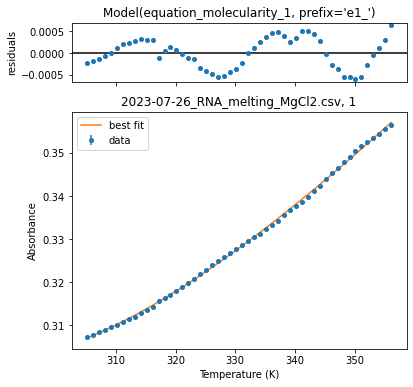

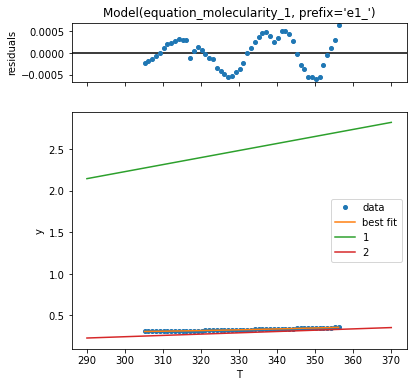

In [22]:
from main import  *
#Inputs to navigate to each single curve
#file name
file_name = '2023-07-26_RNA_melting_MgCl2.csv'
#Measurement index
mi = 1

#### Derivate and Fit
data_obj.derivative_fit(file_name, mi, filter_bounds = [{'column_x': 'Temperature (K)', 'x_min': 310, 'x_max' : 355}], num_peaks = 3)# max 380, min 295

#### Direct Melting
model1 = MeltingCurveAnalysis.create_model_e1()
model2 = MeltingCurveAnalysis.create_model_e2()
model3 = MeltingCurveAnalysis.create_model_e2_e1()

data_obj.direct_melt_fit(file_name, mi, model1, filter_bounds = [{'column_x': 'Temperature (K)', 'x_min': 305, 'x_max' : 357}])
data_obj.get_direct_melt_result(file_name, mi)

data_obj._add_results_to_meta()
data_obj._create_meta_overview()
data_obj.meta_overview
data_obj.apply_filters({'file_name': ['2023-07-26_RNA_melting_MgCl2.csv']})

In [5]:
results_09_01 = data_obj.meta_overview
#results_09_01.loc[results_09_01['file_name'] == '2023-09-21_RNA_melting_NaCl.csv']
results_09_01.to_csv('results_2024-06-12_11_uhr.csv', sep='\t', encoding='utf-8')

In [6]:
list(results_09_01)

['Measurement',
 'Sample Name',
 'Wavelength (nm)',
 'Temperature Start (°C)',
 'Temperature End (°C)',
 'Run',
 'Ramp Type',
 'Sample',
 'bg in mM',
 '[Buffer] in mM',
 'Divalent Ion',
 'Monovalent Ion',
 'gi',
 'file_name',
 'Concentration',
 'Concentration Unit',
 'Ion',
 'deri_fit_Tm_C',
 'deri_fit_dEd/dT',
 'deri_fit_DTm',
 'direct_melt_Tm_C',
 'direct_melt_DTm',
 'direct_melt_DH_J/mol',
 'direct_melt_DDH',
 'direct_melt_m1',
 'direct_melt_Dm1',
 'direct_melt_n1',
 'direct_melt_Dn1',
 'direct_melt_m2',
 'direct_melt_Dm2',
 'direct_melt_n2',
 'direct_melt_Dn2',
 'direct_melt_DS_J/mol/K',
 'direct_melt_DDS']